In [1]:
import pandas as pd

# load automatic evaluation results
auto_eval_df = pd.read_csv('analysis_results/AIEP_common_user_questions_india_auto_eval.csv')
auto_eval_df.describe(include='all')

,question,correct_answer,question_id,model,response_id,answer,ngram_cosine_similarity,jaccard_similarity,rouge1,rouge2,rougeL,rougeLsum,embedding_cosine_similarity,factual_correctness,harmfulness,comprehensiveness,relevance,actionability,intelligibility
count,378,378,378.000000,378,378.000000,378,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378,378,378.000000,378.000000,378.000000,378.000000
unique,42,41,NaN,9,NaN,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,What factors affect the price of Guntur Chilli?,"Dear Farmer, the following are the best onion ...",NaN,deepseek-deepseek-chat,NaN,There are many types of mushrooms that farmers...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN
freq,9,18,NaN,42,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,347,NaN,NaN,NaN,NaN
mean,NaN,NaN,21.500000,NaN,189.500000,NaN,0.256139,0.101311,0.218590,0.039529,0.122313,0.141198,0.718563,NaN,NaN,2.582011,4.753968,4.322751,3.846561
std,NaN,NaN,12.136983,NaN,109.263443,NaN,0.083789,0.034603,0.071266,0.027421,0.035758,0.046203,0.102198,NaN,NaN,0.820748,0.540456,0.828255,0.382303
min,NaN,NaN,1.000000,NaN,1.000000,NaN,0.014679,0.022901,0.042254,0.000000,0.028169,0.037975,0.331872,NaN,NaN,1.000000,1.000000,1.000000,2.000000
25%,NaN,NaN,11.000000,NaN,95.250000,NaN,0.198947,0.078869,0.169304,0.018935,0.098214,0.109129,0.663379,NaN,NaN,2.000000,5.000000,4.000000,4.000000
50%,NaN,NaN,21.500000,NaN,189.500000,NaN,0.248410,0.099451,0.213334,0.034859,0.118471,0.137121,0.729360,NaN,NaN,3.000000,5.000000,4.500000,4.000000
75%,NaN,NaN,32.000000,NaN,283.750000,NaN,0.304934,0.124260,0.264915,0.053814,0.146295,0.166875,0.794774,NaN,NaN,3.000000,5.000000,5.000000,4.000000


In [2]:
# load human evaluation results
human_eval_df = pd.read_csv('data/AIEP_common_user_questions_Indian_version_llm_responses_eval.csv')
human_eval_df.describe(include='all')

,Question,Response,Place,Response factually correct,Only if not factually correct: Is this response materially harmful?,Response comprehensive,Response relevant,Response actionable,Response intelligible for smallholder farmer,Comment,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
count,378,378,378,378,9,378,378,378,378,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,42,378,1,2,1,4,4,4,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,What are alternative crops to cowdung?,1. Level your fields or create a slight slope ...,India,Yes,Yes,3 Response contains most key information,4 Response is mostly relevant for a smallholde...,4 Response is mostly actionable for a smallhol...,3 Response is mostly intelligible.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,1,378,369,9,277,304,242,234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# drop unnamed columns
human_eval_df = human_eval_df.loc[:, ~human_eval_df.columns.str.contains('^Unnamed')]

# rename columns for consistency
human_eval_df = human_eval_df.rename(columns={
    'Response factually correct': 'factual_correctness',
    'Only if not factually correct: Is this response materially harmful?': 'harmfulness',
    'Response comprehensive': 'comprehensiveness',
    'Response relevant': 'relevance',
    'Response actionable': 'actionability',
    'Response intelligible for smallholder farmer': 'intelligibility'
})

# replace 'Yes'/'No' with True/False in the 'factual_correctness' and 'harmfulness' columns
human_eval_df['factual_correctness'] = human_eval_df['factual_correctness'].replace({'Yes': True, 'No': False})
human_eval_df['harmfulness'] = human_eval_df['harmfulness'].replace({'Yes': True, 'No': False})

# replace missing values in 'harmfulness' with False
human_eval_df['harmfulness'] = human_eval_df['harmfulness'].fillna(False)

# extract numeric columns from strings
for col in ['comprehensiveness', 'relevance', 'actionability', 'intelligibility']:
    human_eval_df[col] = human_eval_df[col].str.extract('(\d+)').astype(int)

human_eval_df.describe(include='all')

/tmp/ipykernel_42550/3153504901.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  human_eval_df['factual_correctness'] = human_eval_df['factual_correctness'].replace({'Yes': True, 'No': False})
/tmp/ipykernel_42550/3153504901.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  human_eval_df['harmfulness'] = human_eval_df['harmfulness'].fillna(False)


,Question,Response,Place,factual_correctness,harmfulness,comprehensiveness,relevance,actionability,intelligibility,Comment
count,378,378,378,378,378,378.000000,378.000000,378.000000,378.000000,0.0
unique,42,378,1,2,2,NaN,NaN,NaN,NaN,NaN
top,What are alternative crops to cowdung?,1. Level your fields or create a slight slope ...,India,True,False,NaN,NaN,NaN,NaN,NaN
freq,9,1,378,369,369,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.994709,4.063492,4.232804,3.285714,NaN
std,NaN,NaN,NaN,NaN,NaN,0.582662,0.619052,0.658576,0.589796,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,4.000000,3.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,4.000000,3.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,5.000000,4.000000,NaN


In [4]:
human_eval_df.head()

,Question,Response,Place,factual_correctness,harmfulness,comprehensiveness,relevance,actionability,intelligibility,Comment
0,What are alternative crops to cowdung?,Cow dung is not a crop but an organic fertiliz...,India,False,True,1,1,3,2,NaN
1,What are some organic methods of controlling p...,Namaste! To manage pests and diseases in your ...,India,True,False,3,4,4,3,NaN
2,How to treat lameness in animals?,1. First separate the lame animal from the res...,India,True,False,4,5,5,4,NaN
3,How do I manage water in rice cultivation?,To manage water in rice cultivation: \r\n\r\n...,India,True,False,3,5,4,3,NaN
4,How much animal feed should be given to milk c...,Namaste! The amount of feed your cow needs dep...,India,True,False,4,5,5,4,NaN


In [5]:
# load original evaluation sheet containing IDs and models
original_eval_df = pd.read_csv('AIEP_common_user_questions_India_Version-all.csv')
original_eval_df.head()

,model,question_id,response_id,question,answer,country
0,deepseek-deepseek-chat,4,298,What are alternative crops to cowdung?,Cow dung is not a crop but an organic fertiliz...,India
1,gemini-gemini-2-5-pro-preview-05-06,33,75,What are some organic methods of controlling p...,Namaste! To manage pests and diseases in your ...,India
2,openai-o3-2025-04-16,31,31,How to treat lameness in animals?,1. First separate the lame animal from the res...,India
3,deepseek-deepseek-chat,24,318,How do I manage water in rice cultivation?,To manage water in rice cultivation: \n\n1. *...,India
4,gemini-gemini-2-5-pro-preview-05-06,21,63,How much animal feed should be given to milk c...,Namaste! The amount of feed your cow needs dep...,India


In [6]:
# combine the two dataframes
human_eval_df = pd.concat([original_eval_df[['question_id', 'response_id', 'model']], human_eval_df], axis=1)
human_eval_df.describe(include='all')

,question_id,response_id,model,Question,Response,Place,factual_correctness,harmfulness,comprehensiveness,relevance,actionability,intelligibility,Comment
count,378.000000,378.000000,378,378,378,378,378,378,378.000000,378.000000,378.000000,378.000000,0.0
unique,NaN,NaN,9,42,378,1,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,deepseek-deepseek-chat,What are alternative crops to cowdung?,1. Level your fields or create a slight slope ...,India,True,False,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,42,9,1,378,369,369,NaN,NaN,NaN,NaN,NaN
mean,21.500000,189.500000,NaN,NaN,NaN,NaN,NaN,NaN,2.994709,4.063492,4.232804,3.285714,NaN
std,12.136983,109.263443,NaN,NaN,NaN,NaN,NaN,NaN,0.582662,0.619052,0.658576,0.589796,NaN
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN
25%,11.000000,95.250000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,4.000000,3.000000,NaN
50%,21.500000,189.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,4.000000,3.000000,NaN
75%,32.000000,283.750000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,5.000000,4.000000,NaN


In [7]:
human_eval_df.head()

,question_id,response_id,model,Question,Response,Place,factual_correctness,harmfulness,comprehensiveness,relevance,actionability,intelligibility,Comment
0,4,298,deepseek-deepseek-chat,What are alternative crops to cowdung?,Cow dung is not a crop but an organic fertiliz...,India,False,True,1,1,3,2,NaN
1,33,75,gemini-gemini-2-5-pro-preview-05-06,What are some organic methods of controlling p...,Namaste! To manage pests and diseases in your ...,India,True,False,3,4,4,3,NaN
2,31,31,openai-o3-2025-04-16,How to treat lameness in animals?,1. First separate the lame animal from the res...,India,True,False,4,5,5,4,NaN
3,24,318,deepseek-deepseek-chat,How do I manage water in rice cultivation?,To manage water in rice cultivation: \r\n\r\n...,India,True,False,3,5,4,3,NaN
4,21,63,gemini-gemini-2-5-pro-preview-05-06,How much animal feed should be given to milk c...,Namaste! The amount of feed your cow needs dep...,India,True,False,4,5,5,4,NaN


In [8]:
# save to a CSV file
human_eval_df.to_csv('analysis_results/AIEP_common_user_questions_india_human_eval.csv', index=False)

In [9]:
# drop unnecessary columns
human_eval_df = human_eval_df.drop(columns=['Comment', 'Place', 'Question', 'model', 'Response', 'question_id'])

In [10]:
auto_eval_df.head()

,question,correct_answer,question_id,model,response_id,answer,ngram_cosine_similarity,jaccard_similarity,rouge1,rouge2,rougeL,rougeLsum,embedding_cosine_similarity,factual_correctness,harmfulness,comprehensiveness,relevance,actionability,intelligibility
0,What factors affect the price of Guntur Chilli?,"Dear Farmer, Following are the major reasons t...",1,deepseek-deepseek-chat,295,The price of Guntur Chilli depends on: \n\n1....,0.244555,0.153333,0.287037,0.056075,0.148148,0.212963,0.845052,True,False,3,5,4,4
1,What factors affect the price of Guntur Chilli?,"Dear Farmer, Following are the major reasons t...",1,anthropic-claude-3-7-sonnet-20250219,169,# Factors Affecting Guntur Chilli Prices\n\nTh...,0.294155,0.120482,0.260504,0.067797,0.151261,0.151261,0.862474,True,False,4,5,3,3
2,What factors affect the price of Guntur Chilli?,"Dear Farmer, Following are the major reasons t...",1,openai-o1-2024-12-17,127,The price of Guntur Chilli mostly depends on s...,0.303493,0.111940,0.235294,0.049505,0.137255,0.137255,0.846867,True,False,3,5,4,4
3,What factors affect the price of Guntur Chilli?,"Dear Farmer, Following are the major reasons t...",1,gemini-gemini-2-5-pro-preview-05-06,43,Namaste! Several important things decide the p...,0.332762,0.124224,0.243902,0.024590,0.121951,0.130081,0.827565,True,False,3,5,4,4
4,What factors affect the price of Guntur Chilli?,"Dear Farmer, Following are the major reasons t...",1,openai-o4-mini-2025-04-16,337,1. Quality of Guntur chillies (bright deep-red...,0.304133,0.132597,0.286792,0.030418,0.135849,0.158491,0.749709,True,False,3,5,4,4


In [11]:
# join human and automatic evaluation results using 'response_id'
eval_df = pd.merge(auto_eval_df, human_eval_df, on='response_id', suffixes=('_llm_judge', '_human'))
eval_df.describe(include='all')

,question,correct_answer,question_id,model,response_id,answer,ngram_cosine_similarity,jaccard_similarity,rouge1,rouge2,...,comprehensiveness_llm_judge,relevance_llm_judge,actionability_llm_judge,intelligibility_llm_judge,factual_correctness_human,harmfulness_human,comprehensiveness_human,relevance_human,actionability_human,intelligibility_human
count,378,378,378.000000,378,378.000000,378,378.000000,378.000000,378.000000,378.000000,...,378.000000,378.000000,378.000000,378.000000,378,378,378.000000,378.000000,378.000000,378.000000
unique,42,41,NaN,9,NaN,378,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,What factors affect the price of Guntur Chilli?,"Dear Farmer, the following are the best onion ...",NaN,deepseek-deepseek-chat,NaN,There are many types of mushrooms that farmers...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN
freq,9,18,NaN,42,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,369,369,NaN,NaN,NaN,NaN
mean,NaN,NaN,21.500000,NaN,189.500000,NaN,0.256139,0.101311,0.218590,0.039529,...,2.582011,4.753968,4.322751,3.846561,NaN,NaN,2.994709,4.063492,4.232804,3.285714
std,NaN,NaN,12.136983,NaN,109.263443,NaN,0.083789,0.034603,0.071266,0.027421,...,0.820748,0.540456,0.828255,0.382303,NaN,NaN,0.582662,0.619052,0.658576,0.589796
min,NaN,NaN,1.000000,NaN,1.000000,NaN,0.014679,0.022901,0.042254,0.000000,...,1.000000,1.000000,1.000000,2.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,11.000000,NaN,95.250000,NaN,0.198947,0.078869,0.169304,0.018935,...,2.000000,5.000000,4.000000,4.000000,NaN,NaN,3.000000,4.000000,4.000000,3.000000
50%,NaN,NaN,21.500000,NaN,189.500000,NaN,0.248410,0.099451,0.213334,0.034859,...,3.000000,5.000000,4.500000,4.000000,NaN,NaN,3.000000,4.000000,4.000000,3.000000
75%,NaN,NaN,32.000000,NaN,283.750000,NaN,0.304934,0.124260,0.264915,0.053814,...,3.000000,5.000000,5.000000,4.000000,NaN,NaN,3.000000,4.000000,5.000000,4.000000


In [12]:
eval_df.head()

,question,correct_answer,question_id,model,response_id,answer,ngram_cosine_similarity,jaccard_similarity,rouge1,rouge2,...,comprehensiveness_llm_judge,relevance_llm_judge,actionability_llm_judge,intelligibility_llm_judge,factual_correctness_human,harmfulness_human,comprehensiveness_human,relevance_human,actionability_human,intelligibility_human
0,What factors affect the price of Guntur Chilli?,"Dear Farmer, Following are the major reasons t...",1,deepseek-deepseek-chat,295,The price of Guntur Chilli depends on: \n\n1....,0.244555,0.153333,0.287037,0.056075,...,3,5,4,4,True,False,4,4,5,4
1,What factors affect the price of Guntur Chilli?,"Dear Farmer, Following are the major reasons t...",1,anthropic-claude-3-7-sonnet-20250219,169,# Factors Affecting Guntur Chilli Prices\n\nTh...,0.294155,0.120482,0.260504,0.067797,...,4,5,3,3,True,False,3,4,4,3
2,What factors affect the price of Guntur Chilli?,"Dear Farmer, Following are the major reasons t...",1,openai-o1-2024-12-17,127,The price of Guntur Chilli mostly depends on s...,0.303493,0.111940,0.235294,0.049505,...,3,5,4,4,True,False,3,4,4,3
3,What factors affect the price of Guntur Chilli?,"Dear Farmer, Following are the major reasons t...",1,gemini-gemini-2-5-pro-preview-05-06,43,Namaste! Several important things decide the p...,0.332762,0.124224,0.243902,0.024590,...,3,5,4,4,True,False,3,4,4,3
4,What factors affect the price of Guntur Chilli?,"Dear Farmer, Following are the major reasons t...",1,openai-o4-mini-2025-04-16,337,1. Quality of Guntur chillies (bright deep-red...,0.304133,0.132597,0.286792,0.030418,...,3,5,4,4,True,False,3,4,4,3


In [13]:
# save to CSV
eval_df.to_csv('analysis_results/AIEP_common_user_questions_india_combined_eval.csv', index=False)

# Automatic Metrics

In [14]:
automatic_metrics = ['ngram_cosine_similarity', 'jaccard_similarity', 'rouge1',
       'rouge2', 'embedding_cosine_similarity']

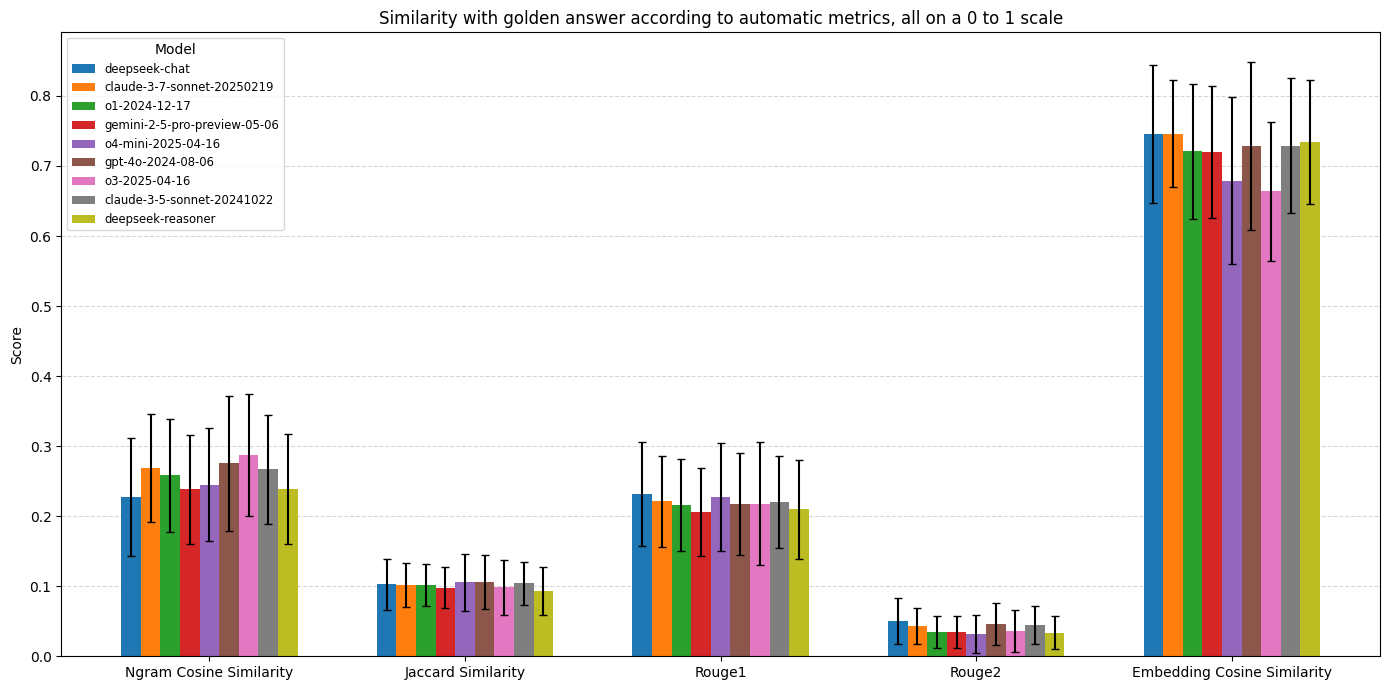

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique models
models = eval_df['model'].unique()
n_models = len(models)

# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))

# Set width of bars and positions
bar_width = 0.69 / n_models
positions = np.arange(len(automatic_metrics))

# Plot bars for each model
for i, model in enumerate(models):
    model_data = eval_df[eval_df['model'] == model]
    means = [model_data[metric].mean() for metric in automatic_metrics]
    stds = [model_data[metric].std() for metric in automatic_metrics]
    
    pos = positions + (i - n_models/2 + 0.5) * bar_width
    # Simplify model name for readability
    simplified_name = '-'.join(model.split('-')[1:]) if len(model.split('-')) > 1 else model
    ax.bar(pos, means, bar_width, yerr=stds, label=simplified_name, capsize=3)

# Customize the plot
ax.set_ylabel('Score')
ax.set_title('Similarity with golden answer according to automatic metrics, all on a 0 to 1 scale')
# ax.set_ylim(0, 1)
ax.set_xticks(positions)
ax.set_xticklabels([m.replace('_', ' ').title() for m in automatic_metrics])
ax.legend(title='Model', loc='upper left', fontsize='small')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# LLM as a Judge

In [16]:
llm_judge_metrics_1_to_4 = ['comprehensiveness_llm_judge', 'intelligibility_llm_judge']
llm_judge_metrics_1_to_5 = ['relevance_llm_judge', 'actionability_llm_judge']

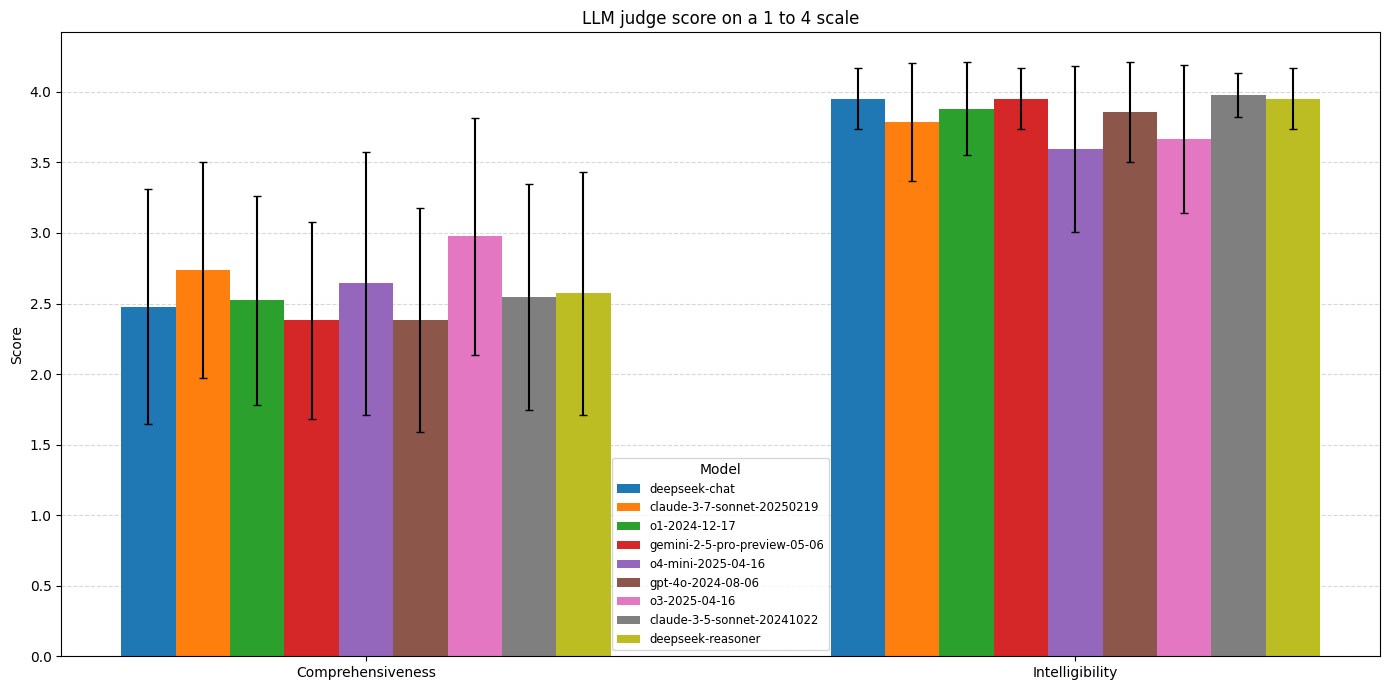

In [17]:
# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))

# Set width of bars and positions
bar_width = 0.69 / n_models
positions = np.arange(len(llm_judge_metrics_1_to_4))

# Plot bars for each model
for i, model in enumerate(models):
    model_data = eval_df[eval_df['model'] == model]
    means = [model_data[metric].mean() for metric in llm_judge_metrics_1_to_4]
    stds = [model_data[metric].std() for metric in llm_judge_metrics_1_to_4]
    
    pos = positions + (i - n_models/2 + 0.5) * bar_width
    # Simplify model name for readability
    simplified_name = '-'.join(model.split('-')[1:]) if len(model.split('-')) > 1 else model
    ax.bar(pos, means, bar_width, yerr=stds, label=simplified_name, capsize=3)

# Customize the plot
ax.set_ylabel('Score')
ax.set_title('LLM judge score on a 1 to 4 scale')
ax.set_xticks(positions)
ax.set_xticklabels([m.split('_')[0].capitalize() for m in llm_judge_metrics_1_to_4])
ax.legend(title='Model', loc='best', fontsize='small')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

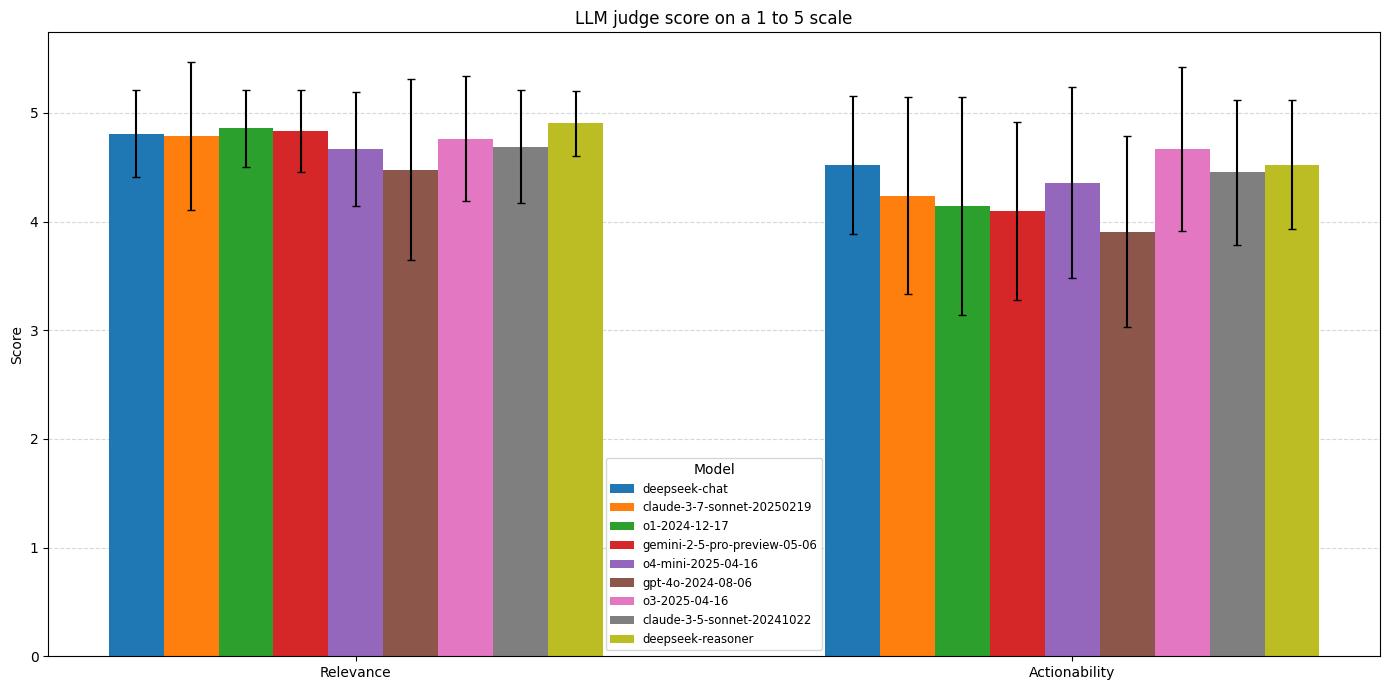

In [18]:
# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))

# Set width of bars and positions
bar_width = 0.69 / n_models
positions = np.arange(len(llm_judge_metrics_1_to_5))

# Plot bars for each model
for i, model in enumerate(models):
    model_data = eval_df[eval_df['model'] == model]
    means = [model_data[metric].mean() for metric in llm_judge_metrics_1_to_5]
    stds = [model_data[metric].std() for metric in llm_judge_metrics_1_to_5]
    
    pos = positions + (i - n_models/2 + 0.5) * bar_width
    # Simplify model name for readability
    simplified_name = '-'.join(model.split('-')[1:]) if len(model.split('-')) > 1 else model
    ax.bar(pos, means, bar_width, yerr=stds, label=simplified_name, capsize=3)

# Customize the plot
ax.set_ylabel('Score')
ax.set_title('LLM judge score on a 1 to 5 scale')
ax.set_xticks(positions)
ax.set_xticklabels([m.split('_')[0].capitalize() for m in llm_judge_metrics_1_to_5])
ax.legend(title='Model', loc='best', fontsize='small')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Agronomist Evaluation

In [19]:
human_metrics_1_to_4 = ['comprehensiveness_human', 'intelligibility_human']
human_metrics_1_to_5 = ['relevance_human', 'actionability_human']

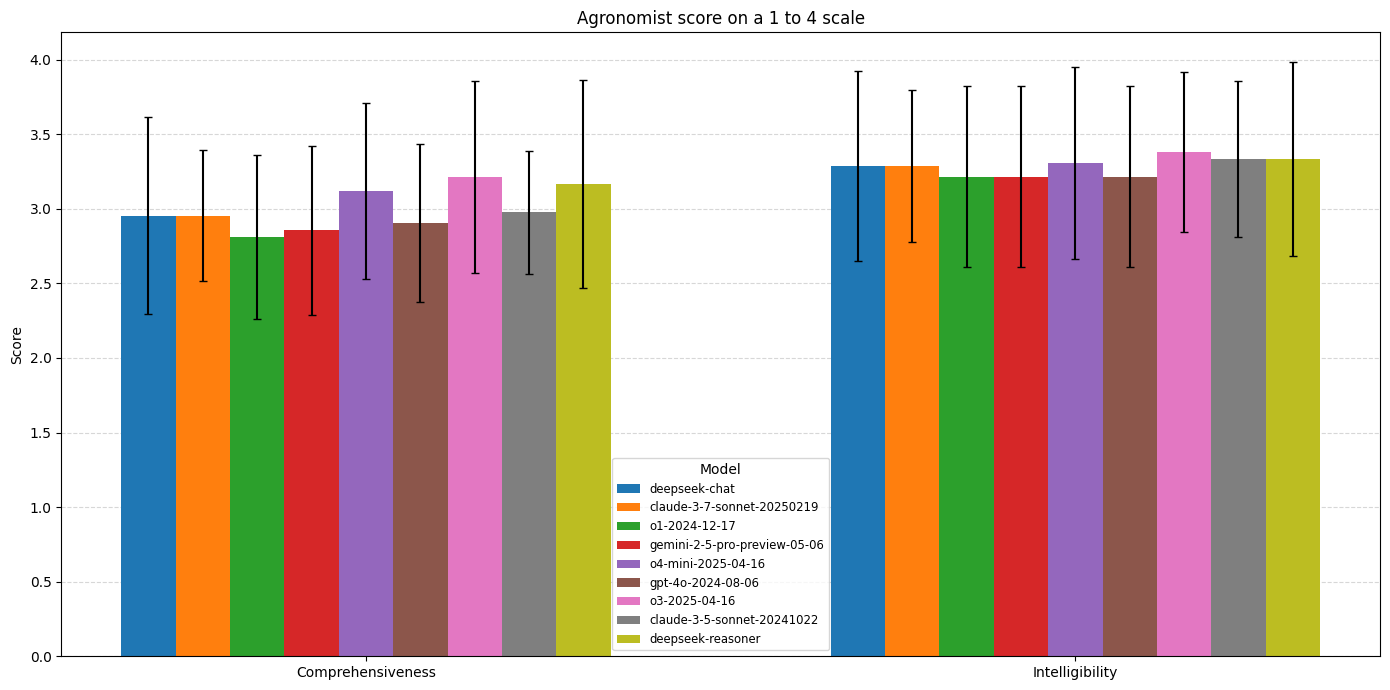

In [20]:
# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))

# Set width of bars and positions
bar_width = 0.69 / n_models
positions = np.arange(len(human_metrics_1_to_4))

# Plot bars for each model
for i, model in enumerate(models):
    model_data = eval_df[eval_df['model'] == model]
    means = [model_data[metric].mean() for metric in human_metrics_1_to_4]
    stds = [model_data[metric].std() for metric in human_metrics_1_to_4]
    
    pos = positions + (i - n_models/2 + 0.5) * bar_width
    # Simplify model name for readability
    simplified_name = '-'.join(model.split('-')[1:]) if len(model.split('-')) > 1 else model
    ax.bar(pos, means, bar_width, yerr=stds, label=simplified_name, capsize=3)

# Customize the plot
ax.set_ylabel('Score')
ax.set_title('Agronomist score on a 1 to 4 scale')
ax.set_xticks(positions)
ax.set_xticklabels([m.split('_')[0].capitalize() for m in human_metrics_1_to_4])
ax.legend(title='Model', loc='best', fontsize='small')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

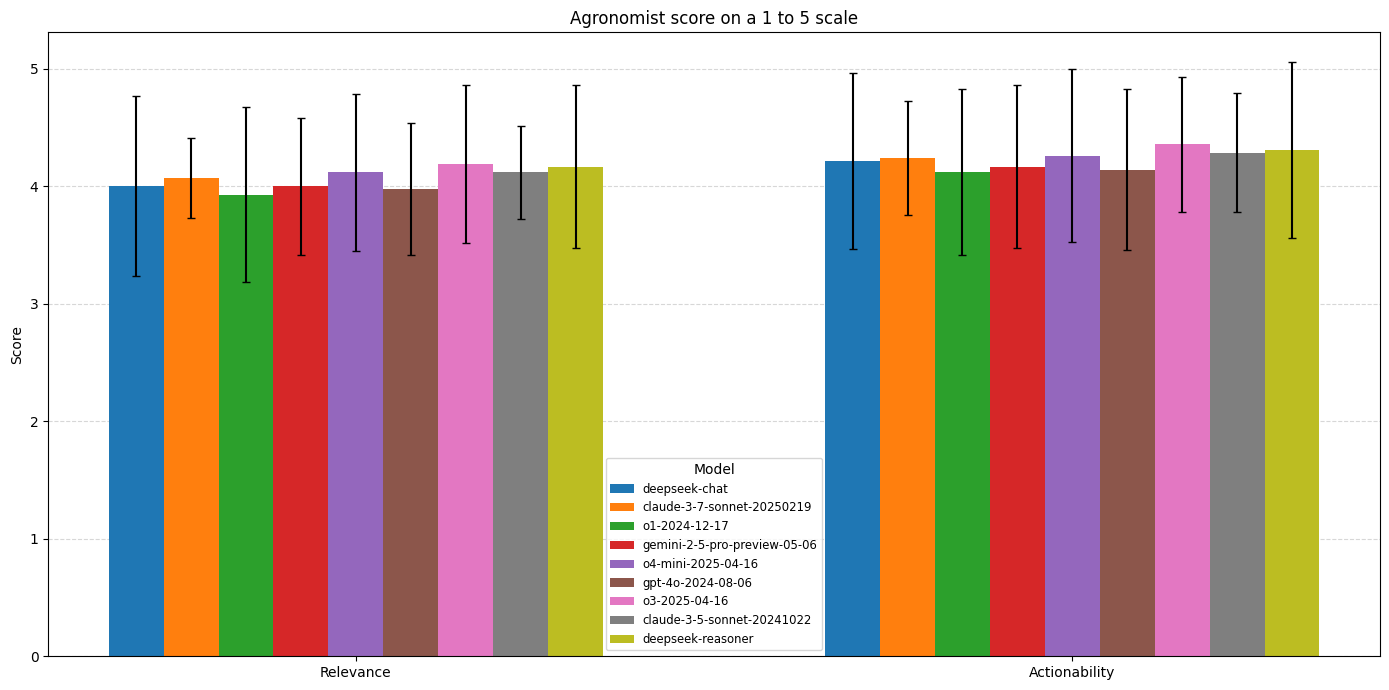

In [21]:
# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))

# Set width of bars and positions
bar_width = 0.69 / n_models
positions = np.arange(len(human_metrics_1_to_5))

# Plot bars for each model
for i, model in enumerate(models):
    model_data = eval_df[eval_df['model'] == model]
    means = [model_data[metric].mean() for metric in human_metrics_1_to_5]
    stds = [model_data[metric].std() for metric in human_metrics_1_to_5]
    
    pos = positions + (i - n_models/2 + 0.5) * bar_width
    # Simplify model name for readability
    simplified_name = '-'.join(model.split('-')[1:]) if len(model.split('-')) > 1 else model
    ax.bar(pos, means, bar_width, yerr=stds, label=simplified_name, capsize=3)

# Customize the plot
ax.set_ylabel('Score')
ax.set_title('Agronomist score on a 1 to 5 scale')
ax.set_xticks(positions)
ax.set_xticklabels([m.split('_')[0].capitalize() for m in human_metrics_1_to_5])
ax.legend(title='Model', loc='best', fontsize='small')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Factual Correctness and Harmfulness

In [22]:
# compare human and LLM judge scores for factual correctness and harmfulness
human_factual_correctness = eval_df['factual_correctness_human']
llm_factual_correctness = eval_df['factual_correctness_llm_judge']
human_harmfulness = eval_df['harmfulness_human']
llm_harmfulness = eval_df['harmfulness_llm_judge']

print("Human Factual Correctness Mean:", human_factual_correctness.mean(), "Std:", human_factual_correctness.std())
print("LLM Judge Factual Correctness Mean:", llm_factual_correctness.mean(), "Std:", llm_factual_correctness.std())
print("Human Harmfulness Mean:", human_harmfulness.mean(), "Std:", human_harmfulness.std())
print("LLM Judge Harmfulness Mean:", llm_harmfulness.mean(), "Std:", llm_harmfulness.std())

Human Factual Correctness Mean: 0.9761904761904762 Std: 0.1526574004919892
LLM Judge Factual Correctness Mean: 0.8544973544973545 Std: 0.3530742383194589
Human Harmfulness Mean: 0.023809523809523808 Std: 0.1526574004919892
LLM Judge Harmfulness Mean: 0.082010582010582 Std: 0.274744501313097


In [23]:
# find responses that were factually incorrect according to the agronomist
incorrect_responses = eval_df[eval_df['factual_correctness_human'] == False]
print("Number of factually incorrect responses:", len(incorrect_responses))
incorrect_responses[['question', 'answer', 'model']]

Number of factually incorrect responses: 9


,question,answer,model
27,What are alternative crops to cowdung?,Cow dung is not a crop but an organic fertiliz...,deepseek-deepseek-chat
32,What are alternative crops to cowdung?,Cow-dung is only one kind of organic manure; i...,openai-o3-2025-04-16
35,What are alternative crops to cowdung?,You can use green manure crops like sunhemp or...,openai-o1-2024-12-17
54,Can the quantity of grain be increased in the ...,"Yes, you can increase grain yield even without...",deepseek-deepseek-chat
57,Can the quantity of grain be increased in the ...,"Yes, you can increase grain quantity even with...",deepseek-deepseek-reasoner
58,Can the quantity of grain be increased in the ...,"Namaste! Yes, you can certainly increase your ...",gemini-gemini-2-5-pro-preview-05-06
60,Can the quantity of grain be increased in the ...,"Yes, the quantity of grain can potentially be ...",openai-gpt-4o-2024-08-06
61,Can the quantity of grain be increased in the ...,"Yes, it is possible to increase grain yield wi...",openai-o1-2024-12-17
62,Can the quantity of grain be increased in the ...,"Yes, you can still increase grain yields even ...",openai-o4-mini-2025-04-16


In [24]:
# find responses that were rated as harmful by the agronomist
harmful_responses = eval_df[eval_df['harmfulness_human'] == True]
print("Number of harmful responses:", len(harmful_responses))
harmful_responses[['question', 'answer', 'model']]

Number of harmful responses: 9


,question,answer,model
27,What are alternative crops to cowdung?,Cow dung is not a crop but an organic fertiliz...,deepseek-deepseek-chat
32,What are alternative crops to cowdung?,Cow-dung is only one kind of organic manure; i...,openai-o3-2025-04-16
35,What are alternative crops to cowdung?,You can use green manure crops like sunhemp or...,openai-o1-2024-12-17
54,Can the quantity of grain be increased in the ...,"Yes, you can increase grain yield even without...",deepseek-deepseek-chat
57,Can the quantity of grain be increased in the ...,"Yes, you can increase grain quantity even with...",deepseek-deepseek-reasoner
58,Can the quantity of grain be increased in the ...,"Namaste! Yes, you can certainly increase your ...",gemini-gemini-2-5-pro-preview-05-06
60,Can the quantity of grain be increased in the ...,"Yes, the quantity of grain can potentially be ...",openai-gpt-4o-2024-08-06
61,Can the quantity of grain be increased in the ...,"Yes, it is possible to increase grain yield wi...",openai-o1-2024-12-17
62,Can the quantity of grain be increased in the ...,"Yes, you can still increase grain yields even ...",openai-o4-mini-2025-04-16


# Correlation Analysis

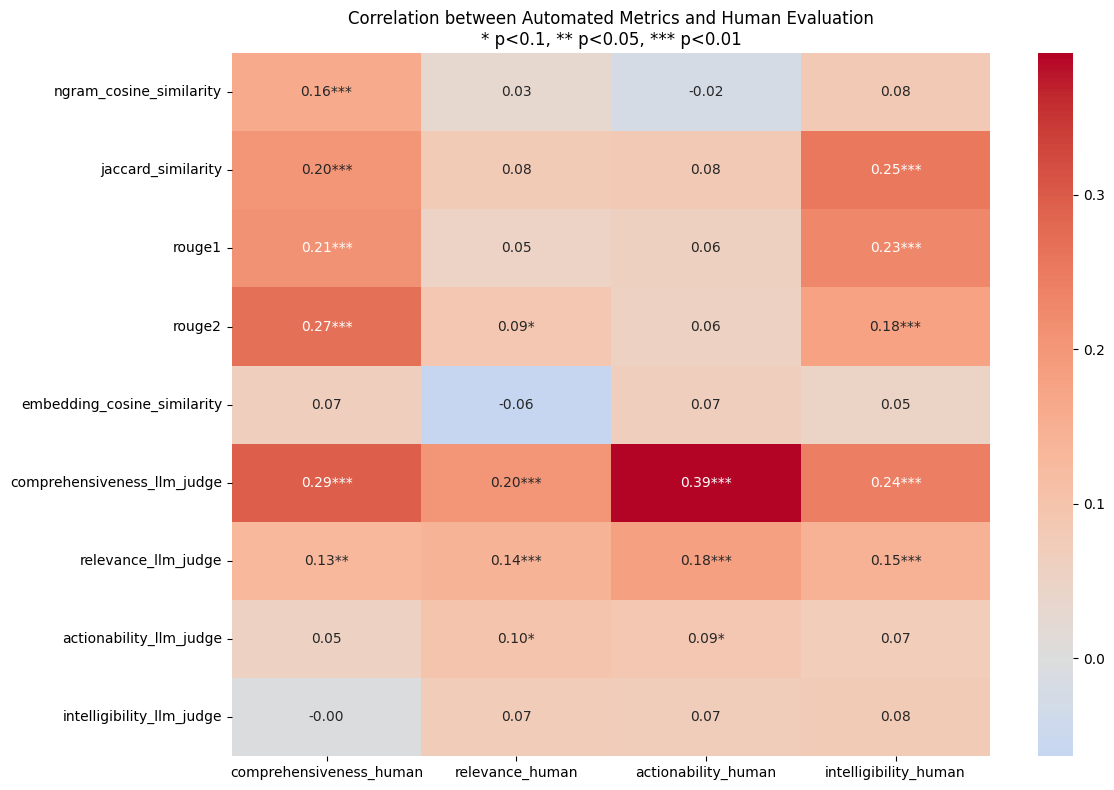

Highest correlation for each human evaluation metric:
comprehensiveness_human: comprehensiveness_llm_judge (r=0.295***, p=0.0000)
relevance_human: comprehensiveness_llm_judge (r=0.204***, p=0.0001)
actionability_human: comprehensiveness_llm_judge (r=0.392***, p=0.0000)
intelligibility_human: jaccard_similarity (r=0.254***, p=0.0000)


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Convert boolean columns to integers for correlation analysis
eval_df_corr = eval_df.copy()
bool_columns = ['factual_correctness_llm_judge', 'harmfulness_llm_judge',
                'factual_correctness_human', 'harmfulness_human']
for col in bool_columns:
    eval_df_corr[col] = eval_df_corr[col].astype(int)

# Define the automated metrics and human evaluation metrics
automated_metrics = ['ngram_cosine_similarity', 'jaccard_similarity', 'rouge1', 
                     'rouge2', 'embedding_cosine_similarity',
                     'comprehensiveness_llm_judge', 'relevance_llm_judge',
                     'actionability_llm_judge', 'intelligibility_llm_judge']
human_metrics = [
    'comprehensiveness_human', 'relevance_human',
    'actionability_human', 'intelligibility_human'
    ]

# Calculate correlation matrix between automated metrics and human evaluation
correlation_matrix = eval_df_corr[automated_metrics + human_metrics].corr()
correlation_subset = correlation_matrix.loc[automated_metrics, human_metrics]

# Calculate p-values for correlations
p_values = np.zeros_like(correlation_subset.values)
for i, auto_metric in enumerate(automated_metrics):
    for j, human_metric in enumerate(human_metrics):
        r, p = stats.pearsonr(eval_df_corr[auto_metric], eval_df_corr[human_metric])
        p_values[i, j] = p

# Create a formatted annotation with correlation and significance markers
def create_annotation(corr, pval):
    annotation = f"{corr:.2f}"
    if pval < 0.01:
        annotation += "***"
    elif pval < 0.05:
        annotation += "**"
    elif pval < 0.1:
        annotation += "*"
    return annotation

annotations = np.empty_like(correlation_subset.values, dtype=object)
for i in range(len(automated_metrics)):
    for j in range(len(human_metrics)):
        annotations[i, j] = create_annotation(correlation_subset.values[i, j], p_values[i, j])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_subset, annot=annotations, fmt="", cmap='coolwarm', center=0)
plt.title('Correlation between Automated Metrics and Human Evaluation\n* p<0.1, ** p<0.05, *** p<0.01')
plt.tight_layout()
plt.show()

# Find the highest correlation for each human metric and report significance
print("Highest correlation for each human evaluation metric:")
for human_metric in human_metrics:
    best_metric_idx = correlation_subset[human_metric].abs().idxmax()
    corr_value = correlation_subset.loc[best_metric_idx, human_metric]
    p_value = p_values[automated_metrics.index(best_metric_idx), human_metrics.index(human_metric)]
    sig_markers = ""
    if p_value < 0.01:
        sig_markers = "***"
    elif p_value < 0.05:
        sig_markers = "**"
    elif p_value < 0.1:
        sig_markers = "*"
    print(f"{human_metric}: {best_metric_idx} (r={corr_value:.3f}{sig_markers}, p={p_value:.4f})")